# Importando dados para aprendizado não supervisionado

Utilização do get_dummies para transformar os generos em dados binários

In [0]:
import pandas as pd

dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv")
dados.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
#nomes = {
#    'movieId' : 'filme_id',
#    'title' : 'titulo',
#    'genres' : 'generos'
#}

#dados = dados.rename(columns=nomes)
#dados.head()

dados.columns = ['filme_id', 'titulo', 'generos']
dados.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
generos = dados.generos.str.get_dummies()
dados_filmes = pd.concat([dados, generos], axis=1)#axis 1 = colunas

In [0]:
dados_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#dados_filmes = dados_filmes.drop(['generos'], axis=1)
#dados_filmes.head()

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [0]:
generos_escalados.shape

(9742, 20)

# Clusterização usando KMeans

Será utilizado o KMeans para agrupar em 3 grupos os gêneros dos filmes

In [0]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters= 3)
modelo.fit(generos_escalados)

print(f'Grupo {modelo.labels_}')

Grupo [2 2 0 ... 0 2 0]


In [0]:
print(generos.columns)
modelo.cluster_centers_

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


array([[ 0.03823997, -0.25858068, -0.22145569, -0.25170979, -0.26911024,
         0.24487007, -0.15654737,  0.13646545,  0.19431272, -0.17083582,
        -0.07696435, -0.27782722, -0.10699326,  0.02331287, -0.18391357,
         0.20977074, -0.25915759, -0.47076411,  0.09919741,  0.04628178],
       [-0.05917995,  0.5084134 ,  0.03434215, -0.23447983, -0.26754108,
        -0.59548609,  0.46922761, -0.21572361, -0.18122325, -0.11364569,
         0.20521027,  0.714124  ,  0.10675351, -0.17632711,  0.45448464,
        -0.34553767,  0.50554253,  1.21090996, -0.14723097, -0.0642627 ],
       [-0.05917995,  0.13111864,  1.10931972,  1.94078854,  2.11684496,
         0.15929761, -0.32191099, -0.19993096, -0.59776377,  1.20411866,
        -0.09492563, -0.27642177,  0.31182253,  0.31256015, -0.13762909,
        -0.27269098,  0.14136748, -0.47052824, -0.1691444 , -0.08992819]])

In [0]:
dados = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

In [0]:
dados

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.03824,-0.258581,-0.221456,-0.251710,-0.269110,0.244870,-0.156547,0.136465,0.194313,-0.170836,-0.076964,-0.277827,-0.106993,0.023313,-0.183914,0.209771,-0.259158,-0.470764,0.099197,0.046282
1,-0.05918,0.508413,0.034342,-0.234480,-0.267541,-0.595486,0.469228,-0.215724,-0.181223,-0.113646,0.205210,0.714124,0.106754,-0.176327,0.454485,-0.345538,0.505543,1.210910,-0.147231,-0.064263
2,-0.05918,0.131119,1.109320,1.940789,2.116845,0.159298,-0.321911,-0.199931,-0.597764,1.204119,-0.094926,-0.276422,0.311823,0.312560,-0.137629,-0.272691,0.141367,-0.470528,-0.169144,-0.089928


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f63c28d86a0>,
      dtype=object)

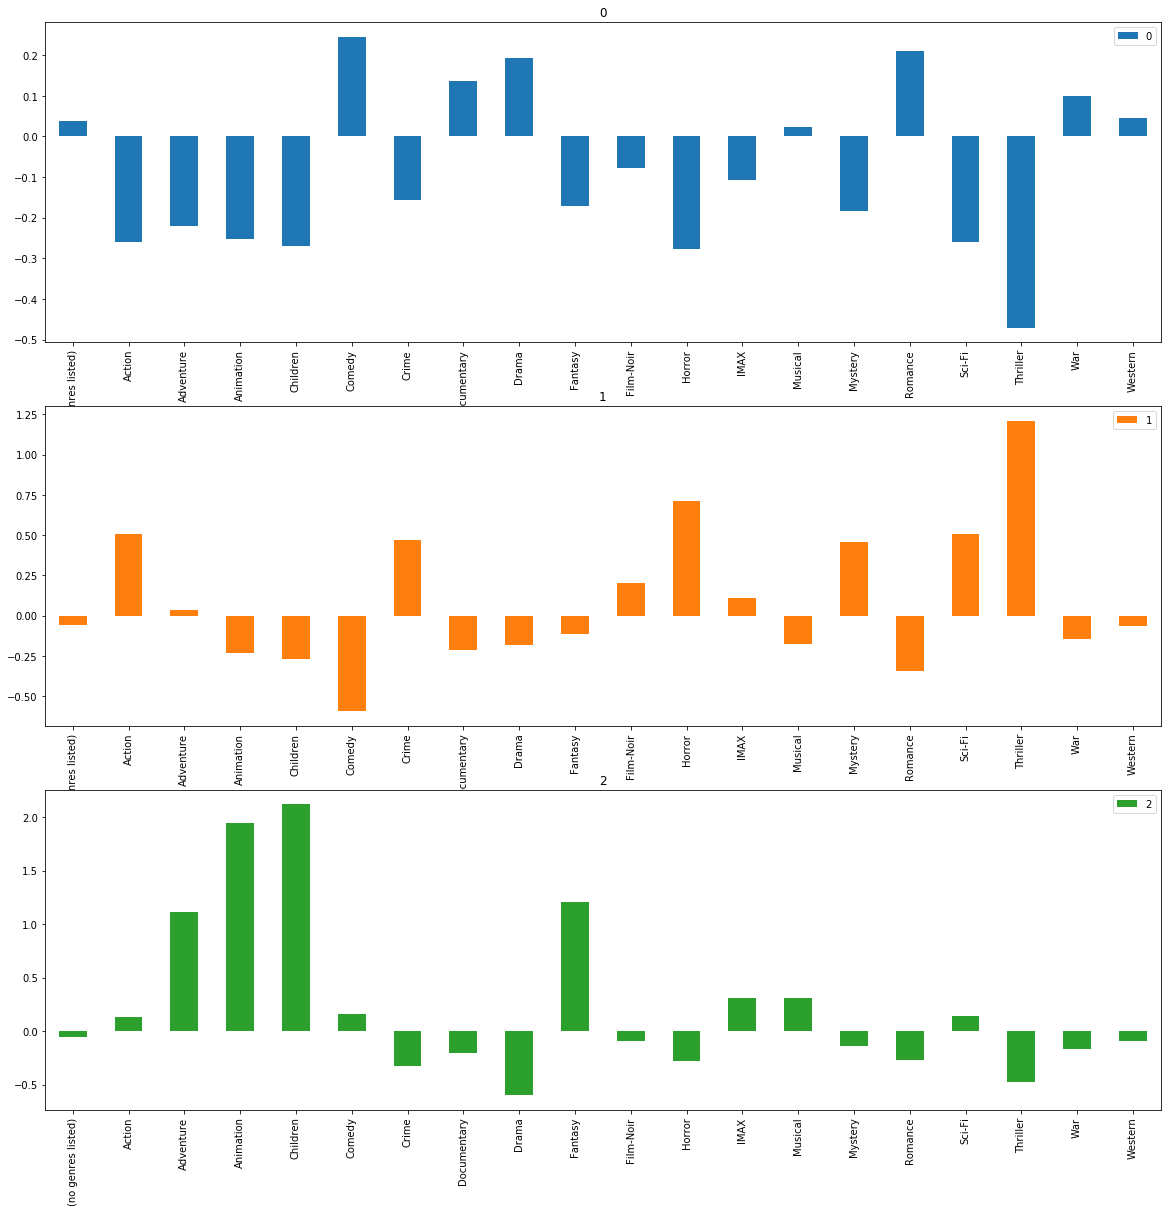

In [0]:
dados.transpose().plot.bar(subplots=True, figsize=(20, 20), sharex=False, )

# Simulando dados e achando seus centroids da clusterização

In [0]:
from sklearn.datasets import make_blobs

dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


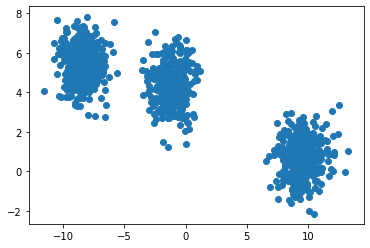

In [0]:
import matplotlib.pyplot as plt

plt.scatter(x=dados.coluna1, y=dados.coluna2)

In [0]:
modelo = KMeans(n_clusters=3)
grupos = modelo.fit_predict(dados)

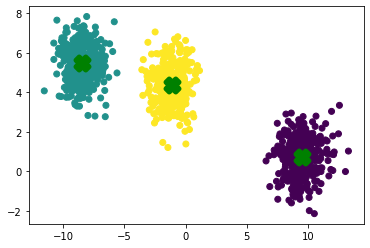

In [0]:
centroides = modelo.cluster_centers_
plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)

# Plotando gráfico com Seaborn para dados dos filmes

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[  3.67141  ,  45.84862  ],
       [-57.431263 ,   5.4511003],
       [ 10.301718 , -30.293427 ],
       ...,
       [-11.160939 ,  20.994013 ],
       [ 41.4198   , -16.865936 ],
       [ 19.280773 ,  -1.7689663]], dtype=float32)

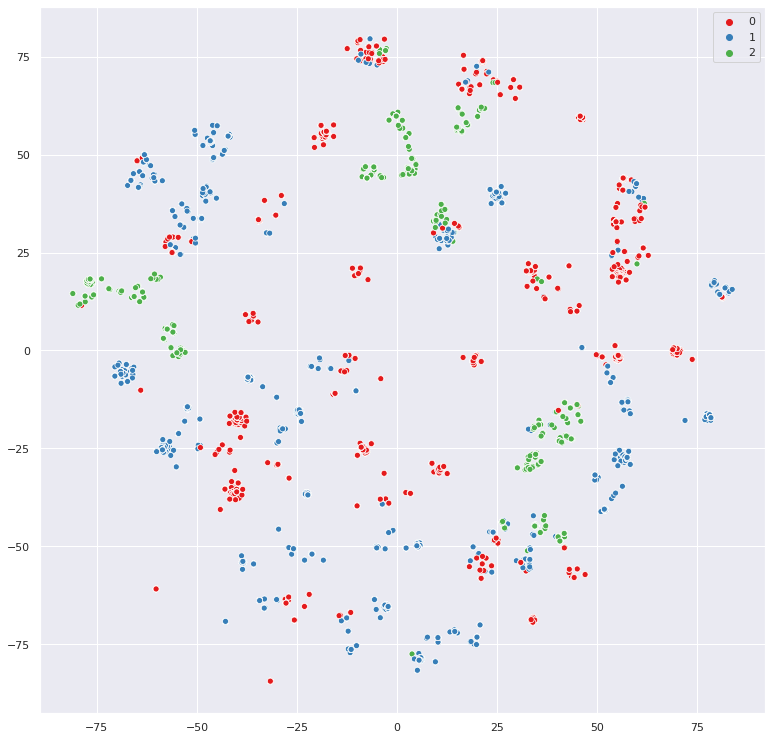

In [0]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

# Clusterizando com 20 grupos

In [0]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
dados = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
dados.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,0.244750,-0.325441,-0.258679,-0.270451,-0.149035,2.669289,-0.217489,0.410480,-0.289814,-0.094926,-0.302493,-0.128397,-0.188419,-0.249986,-0.307175,-0.316415,0.481131,-0.202020,-0.132065
1,-0.05918,-0.356834,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.160386,-0.202020,-0.132065
2,-0.05918,-0.146991,1.315176,3.865793,3.697524,0.321475,-0.285105,-0.217489,-0.756600,0.774060,-0.094926,-0.320074,-0.128397,0.157951,-0.196412,-0.283702,-0.082998,-0.491259,-0.158725,-0.132065
3,-0.05918,-0.462136,-0.364480,-0.238850,-0.260913,-0.604451,-0.338046,4.597924,-0.808396,-0.285947,-0.094926,-0.318057,-0.128397,-0.188419,-0.229553,-0.429644,-0.334435,-0.479111,-0.078173,-0.132065
4,-0.05918,0.432043,0.024668,-0.258679,-0.270451,-0.308008,-0.269669,-0.217489,-0.322358,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.186425,2.990120,0.300195,-0.202020,-0.132065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f63bf4f6550>,
      dtype=object)

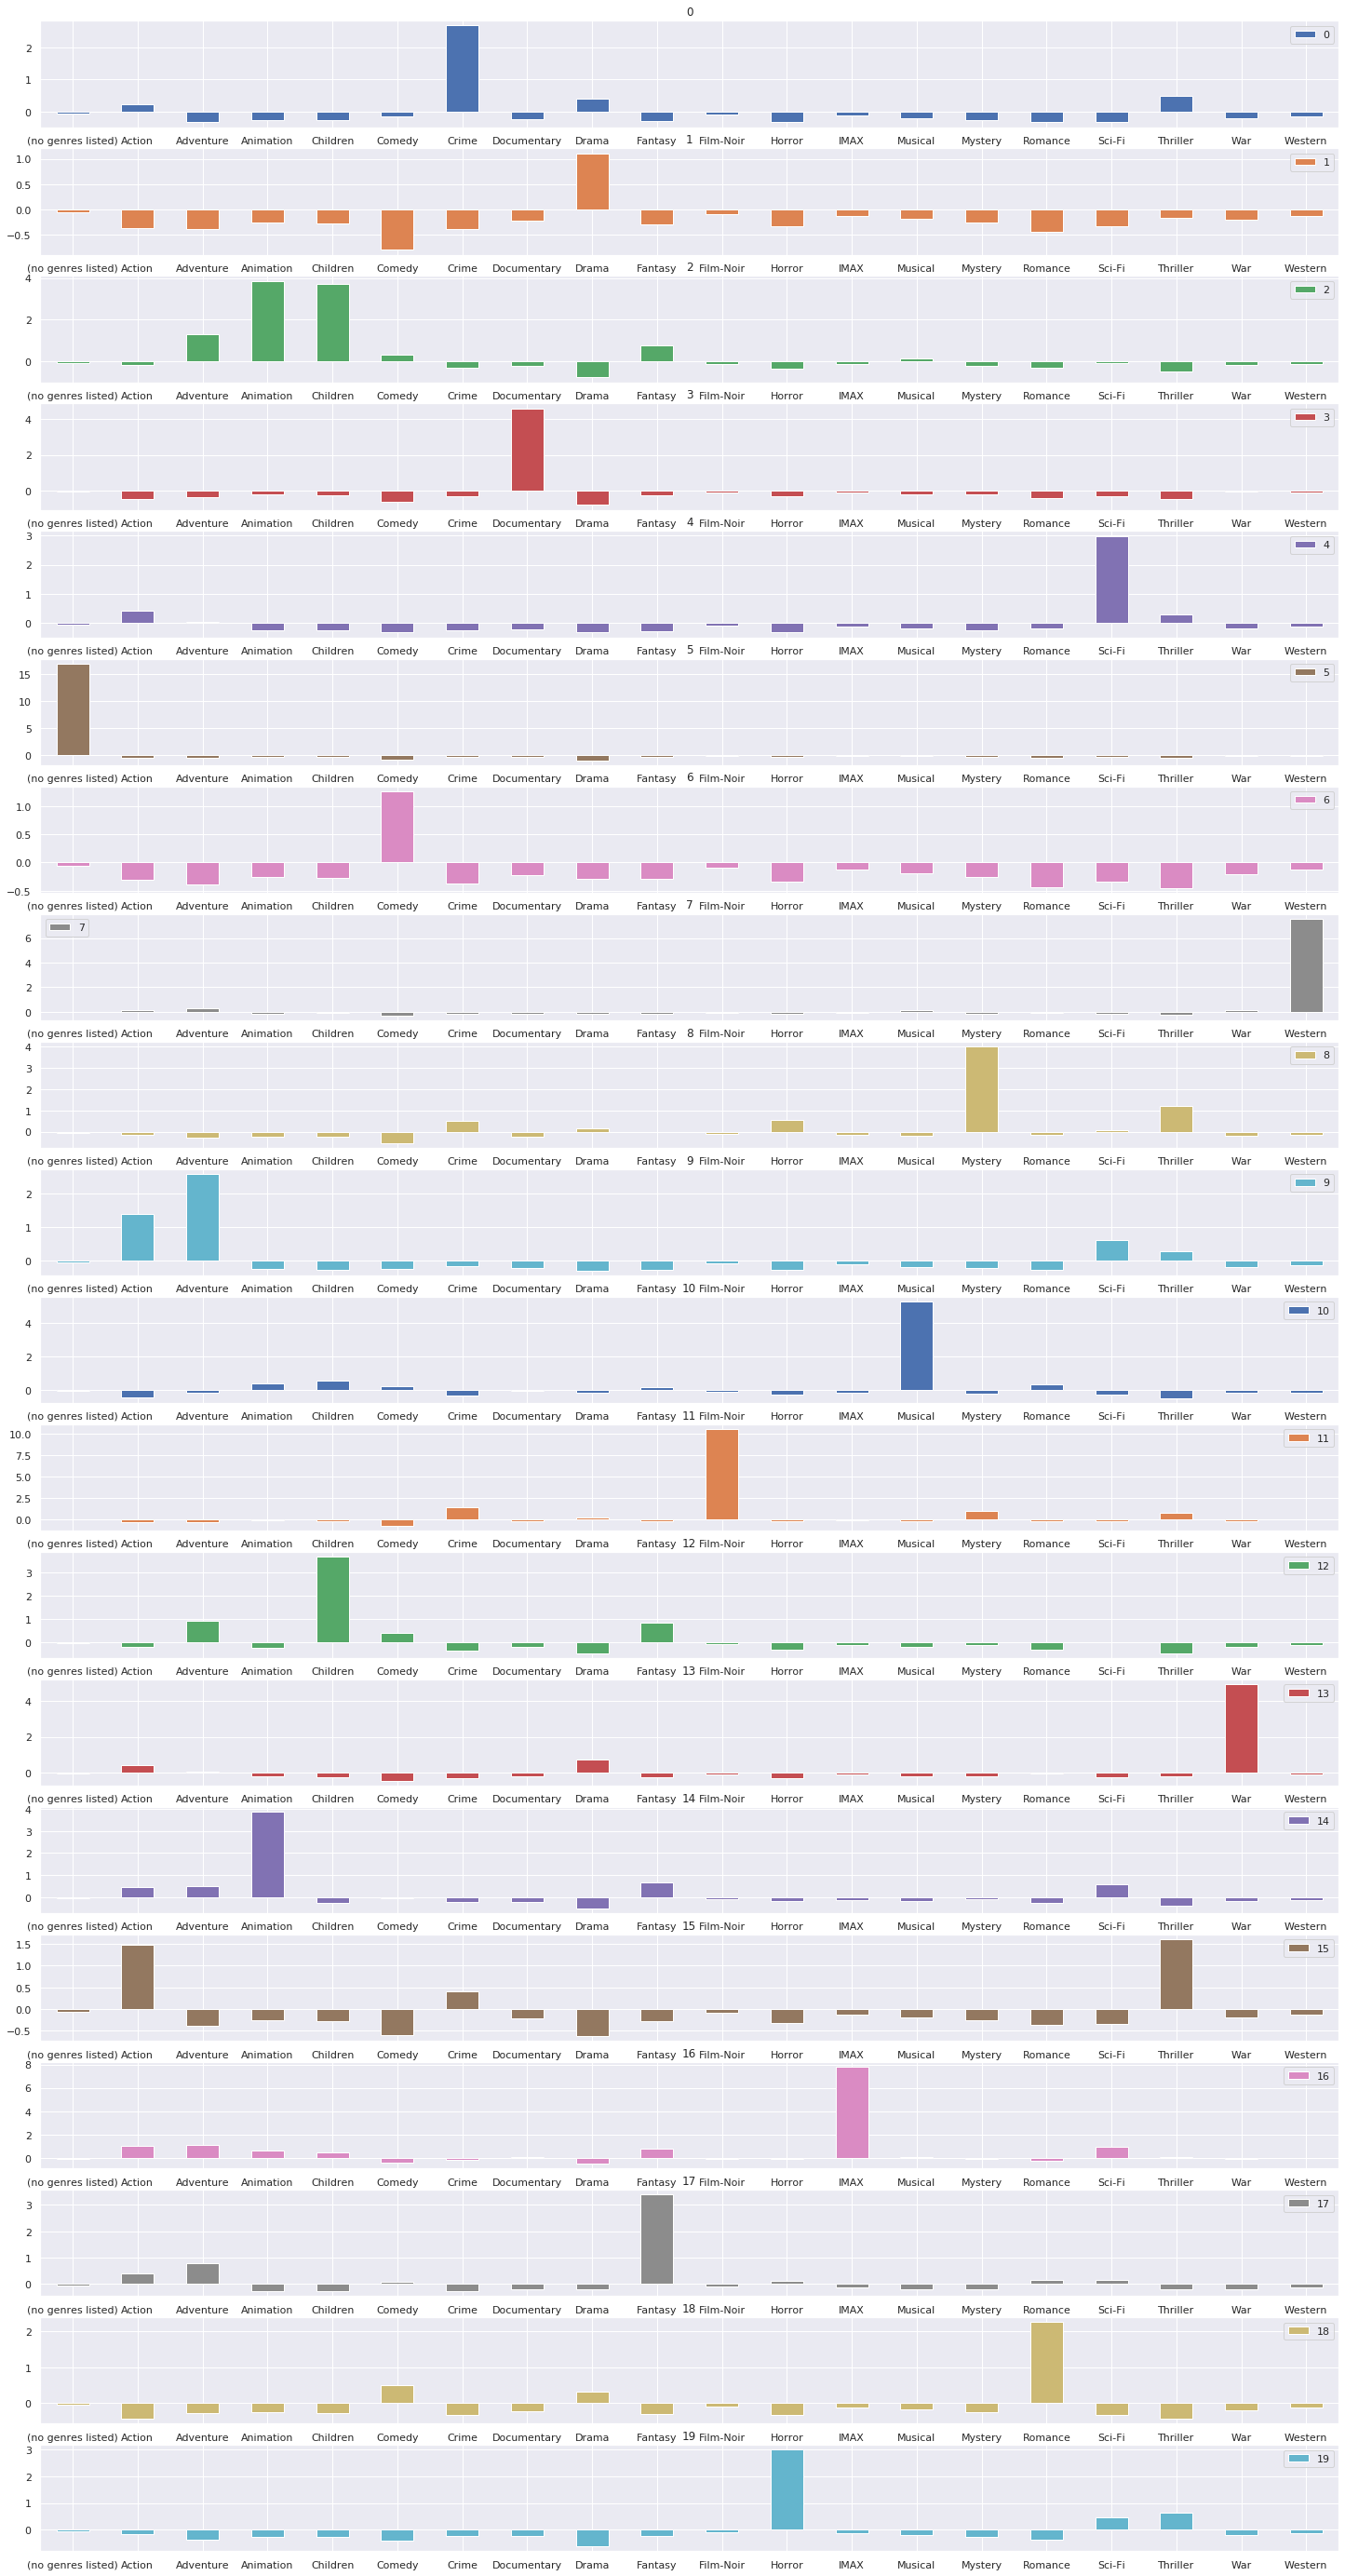

In [0]:
dados.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0)

In [0]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6235,46337,Garfield: A Tail of Two Kitties (2006),Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
673,888,Land Before Time III: The Time of the Great Gi...,Adventure|Animation|Children|Musical,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9612,176621,Boniface's Holiday (1965),Animation|Children|Comedy|Romance,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7906,95167,Brave (2012),Action|Adventure|Animation|Children,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2978,3990,Rugrats in Paris: The Movie (2000),Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6504,53460,Surf's Up (2007),Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7583,86286,Daffy Duck's Quackbusters (1988),Animation|Children|Comedy|Horror,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8983,138702,Feast (2014),Animation|Children|Comedy|Drama|Romance,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8707,124404,"Snowflake, the White Gorilla (2011)",Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,13,Balto (1995),Adventure|Animation|Children,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Plotando gráfico para achar o Elbow Point

Normalmente para se achar o melhor numero de grupos, é necessário plotar um gráfico para achar o Elbow Point. Ele seria um ponto de quebra no gráfico que teria a melhor distancia dos pontos para o centroide do cluster.

In [0]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [0]:
kmeans(20, generos_escalados)

[20, 54678.87655223765]

In [0]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179535.2854663082],
 [3, 166077.02314622657],
 [4, 157011.67010261587],
 [5, 147575.97833144935],
 [6, 138089.94037384118],
 [7, 128452.7923344437],
 [8, 120244.08370937103],
 [9, 109402.76831796435],
 [10, 102514.86480696796],
 [11, 93074.58514244494],
 [12, 87626.74938165149],
 [13, 81068.61523990303],
 [14, 73879.37785272076],
 [15, 67324.7730130603],
 [16, 64269.43745251955],
 [17, 61626.115748902055],
 [18, 59739.31939102271],
 [19, 57229.641968583695],
 [20, 54958.5222442215],
 [21, 53575.07094698592],
 [22, 51890.2122463559],
 [23, 50456.72955514245],
 [24, 49887.92400811395],
 [25, 47560.2608904012],
 [26, 46432.248810030505],
 [27, 45636.37395028707],
 [28, 44645.435222681765],
 [29, 43704.36113473878],
 [30, 43060.742034234085],
 [31, 42621.577667944926],
 [32, 40884.81057051662],
 [33, 40170.48930843219],
 [34, 39061.88418710173],
 [35, 38518.74083335074],
 [36, 37692.46591246555],
 [37, 37839.20013982649],
 [38, 35941.07811323333],
 [39, 36087.180152394

In [0]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])

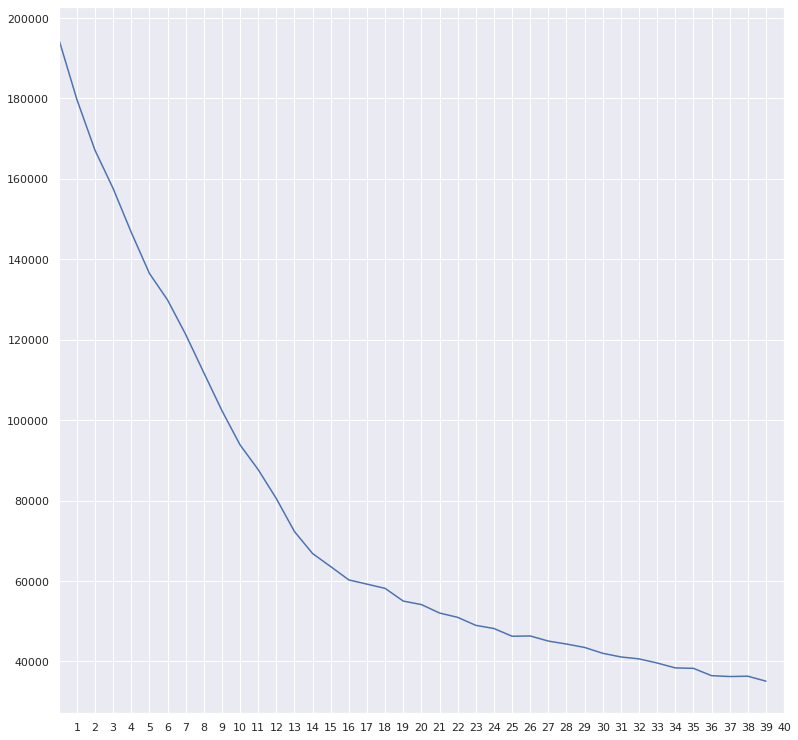

In [0]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f63be7b4390>,
      dtype=object)

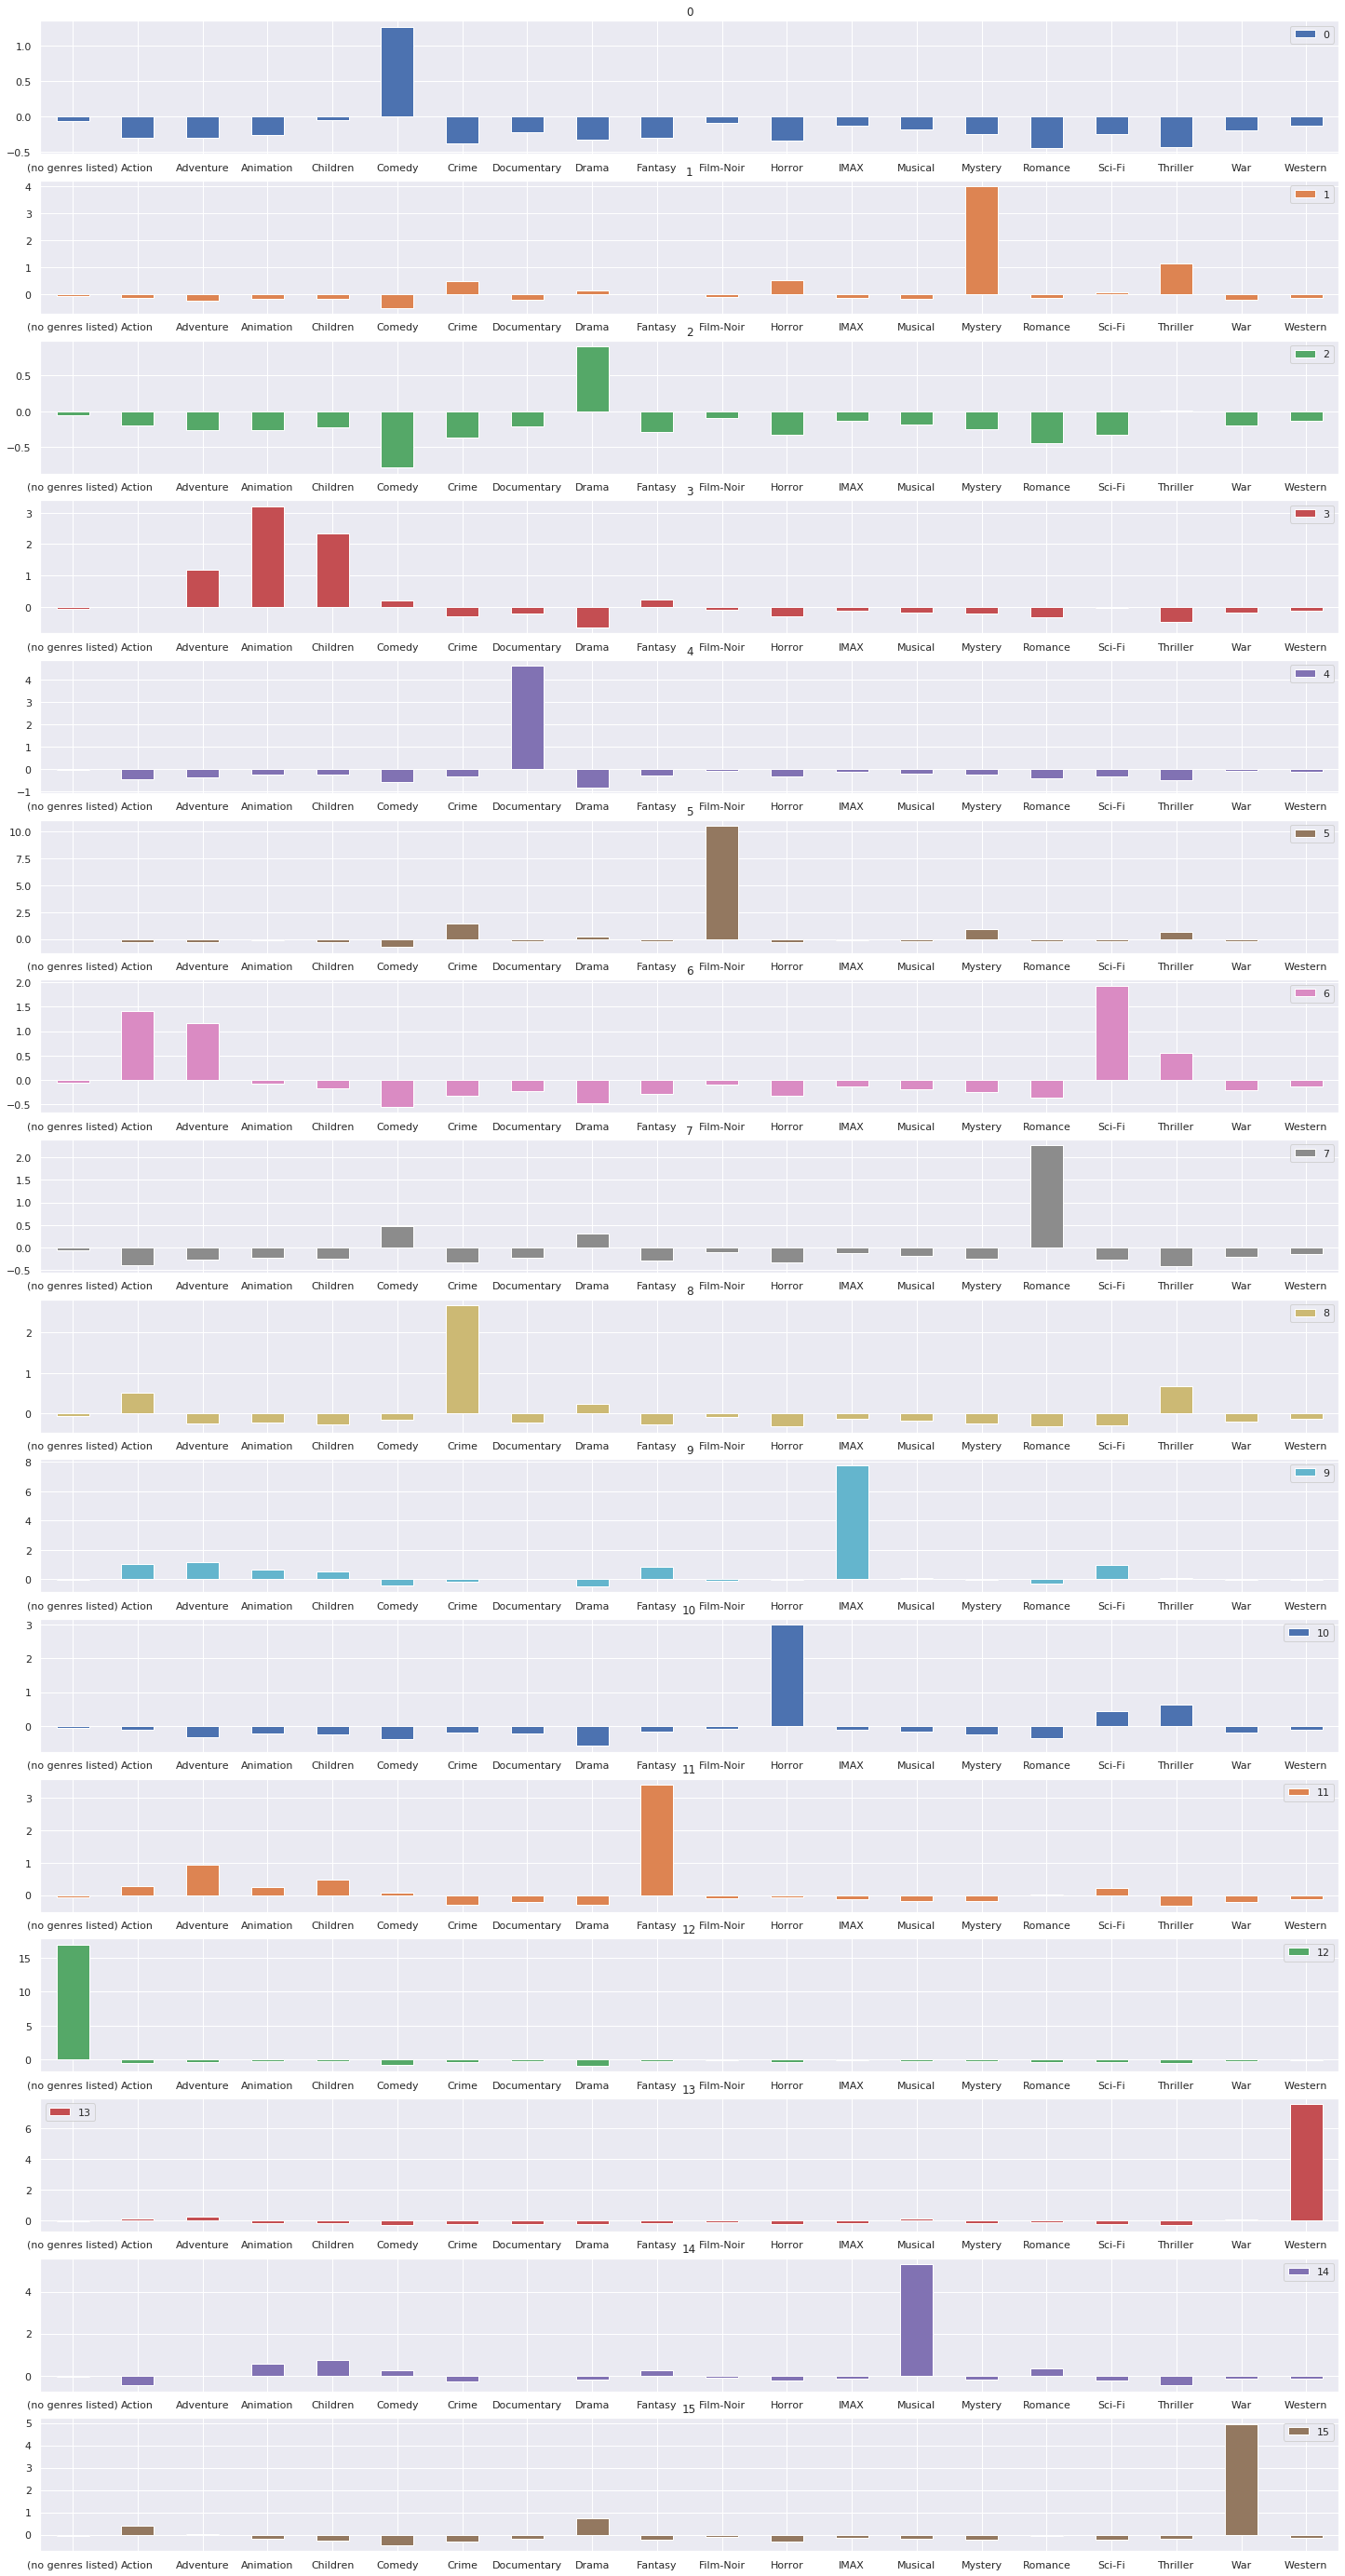

In [0]:
from sklearn.cluster import KMeans
#Elbow point fica no ponto 16 segundo o gráfico, sendo ele é menlhor número de clusters
modelo = KMeans(n_clusters=16)
modelo.fit(generos_escalados)
dados = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
dados.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0)

In [0]:
grupo = 13

filtro = modelo.labels_ == grupo

dados_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3208,4329,Rio Bravo (1959),Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5876,33126,"Frisco Kid, The (1979)",Comedy|Western,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1408,1928,Cimarron (1931),Drama|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1801,2401,Pale Rider (1985),Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2518,3368,"Big Country, The (1958)",Romance|Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9123,146024,A Man from Boulevard des Capucines (1987),Comedy|Romance|Western,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7336,77931,Stingray Sam (2009),Comedy|Musical|Sci-Fi|Western,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
5051,7896,Ride the High Country (1962),Adventure|Drama|Western,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3866,5435,Hombre (1967),Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
765,1007,"Apple Dumpling Gang, The (1975)",Children|Comedy|Western,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Agrupamento hierarquico e plotagem de gráfico usando dendograma

In [0]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [0]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)

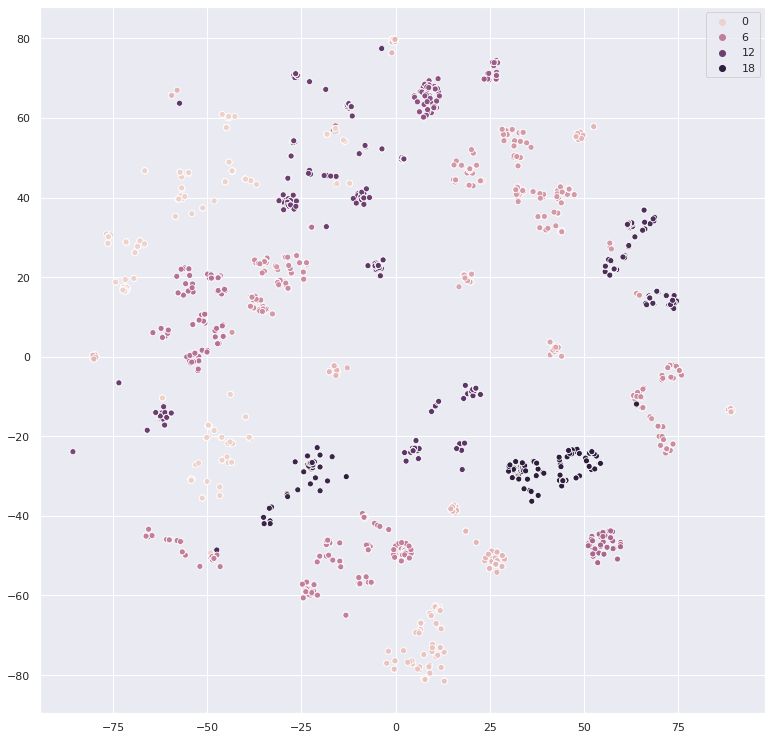

In [0]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f63bd0bb358>,
      dtype=object)

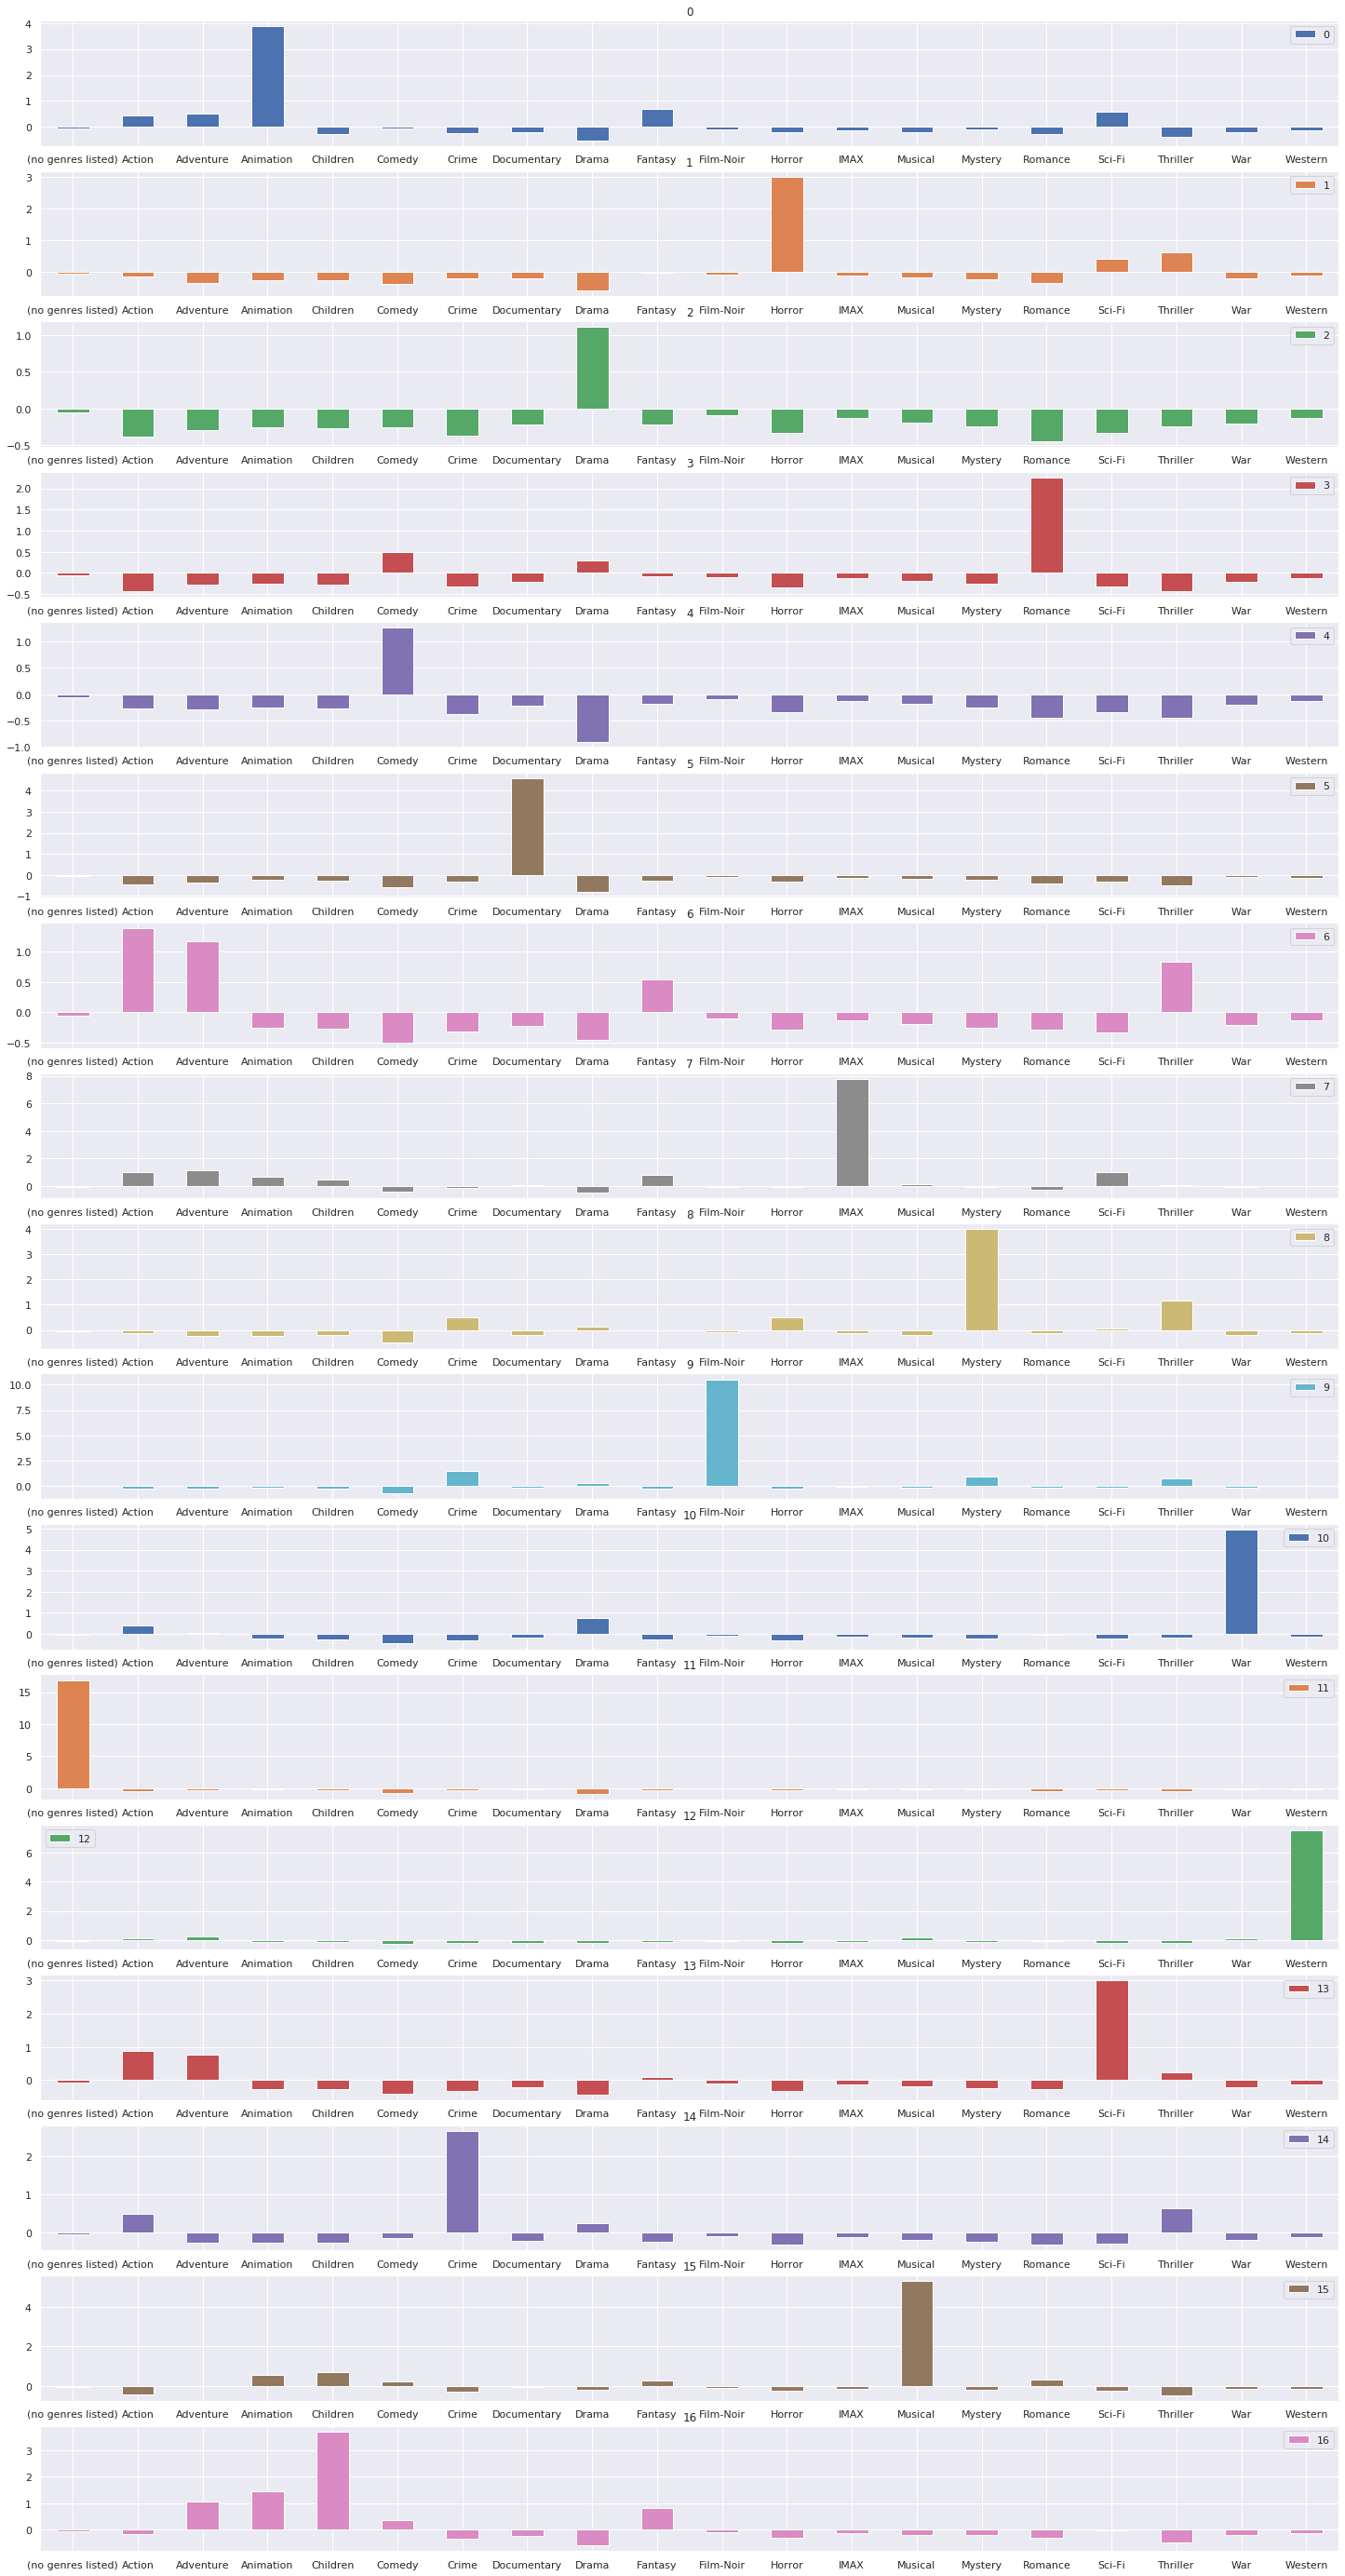

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)


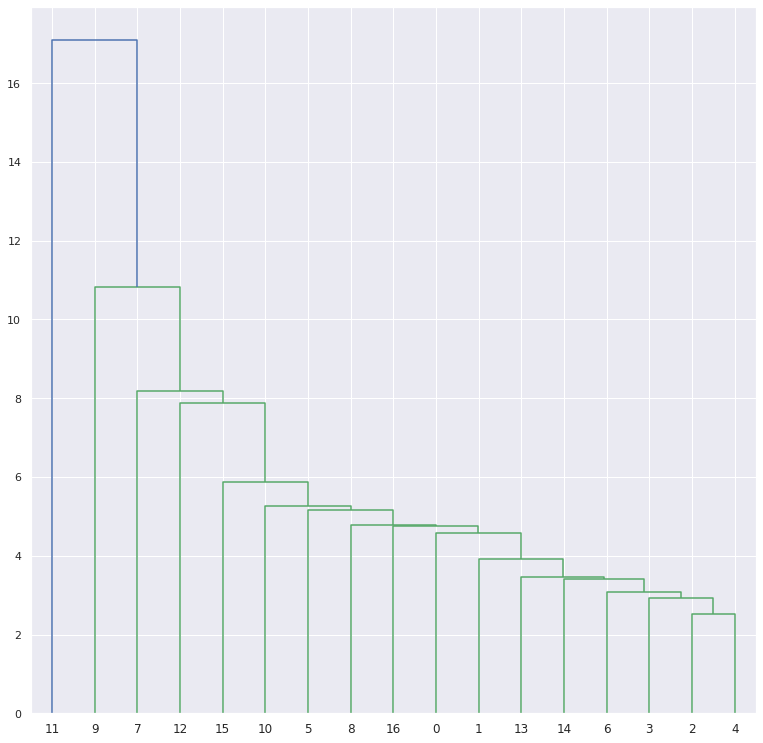

In [0]:

matriz_de_distancia = linkage(grupos)

dendrograma = dendrogram(matriz_de_distancia)